# Regresión Logística: Ejercicio Propuesto

En este proyecto, trabajaremos con un conjunto de datos publicitarios falsos, que indica si un determinado usuario de Internet hizo clic en un anuncio o no. Trataremos de crear un modelo que prediga si harán clic en un anuncio basado en las características de ese usuario.

Este conjunto de datos contiene las siguientes características:

* 'Daily Time Spent on Site': el tiempo del cliente en el sitio en minutos
* 'Age': edad del cliente en años
* 'Area Income': Prom. Ingresos del área geográfica del cliente
* 'Daily Internet Usage': Prom. minutos al día del cliente en internet
* 'Ad Topic Line': título del anuncio
* 'City': ciudad del cliente
* 'Male': si el cliente era o no hombre
* 'Country': País del cliente
* 'Timestamp': hora en la que el consumidor hizo clic en el Anuncio o cerró la ventana
* 'Clicked on Ad': 0 or 1 si se hizo clic en el anuncio

## Importación de Librerias

**Importe algunas bibliotecas que crea que necesitará (¡o simplemente importelas a medida que avanza!)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Recupere los datos
**Lea en el archivo advertising.csv y configúrelo en un data frame llamado ad_data. **

In [2]:
ad_data = pd.read_csv('advertising.csv')

**Revise las primeras filas de ad_data**

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info y describe() en ad_data**

In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Análisis de Datos Exploratorio

¡Usemos seaborn para explorar los datos!

¡Intenta recrear los trazados que se muestran a continuación!

** Crea un histograma de la edad **

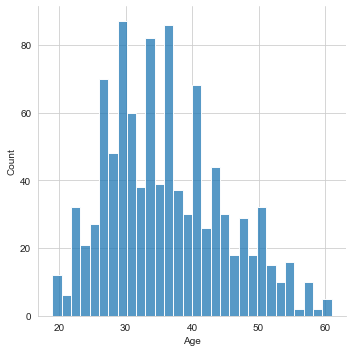

In [6]:
sns.set_style("whitegrid")
sns.displot(ad_data['Age'],bins=30)

**Crear un jointplot mostrando Area Income vs Age.**

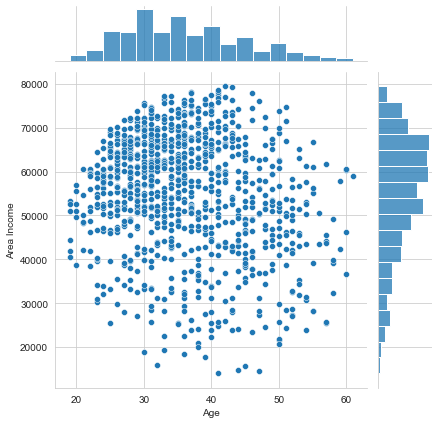

In [7]:
sns.jointplot(x='Age',y='Area Income',data=ad_data)

**Crear un jointplot mostrando la distribución kde de "Daily Time spent on site" vs. "Age".**

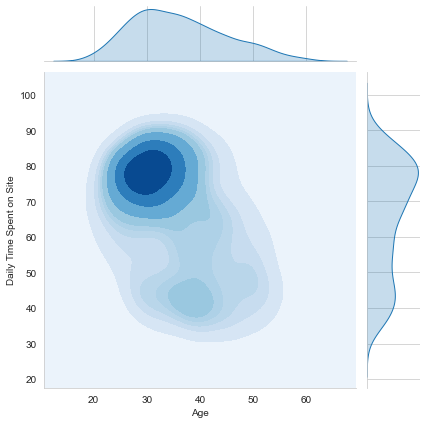

In [8]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',kind='kde',
              data=ad_data,thresh=0,fill=True,cmap='Blues')

** Crear un jointplot de "Daily Time Spent on Site" vs. "Daily Internet Usage"**

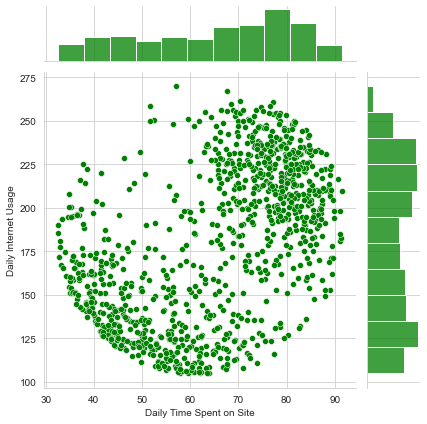

In [9]:
sns.jointplot(x='Daily Time Spent on Site',
              y='Daily Internet Usage',data=ad_data,color='green')

** Finalmente, crear un pairplot con el hue definido por la columna característica "Clicked on Ad".**

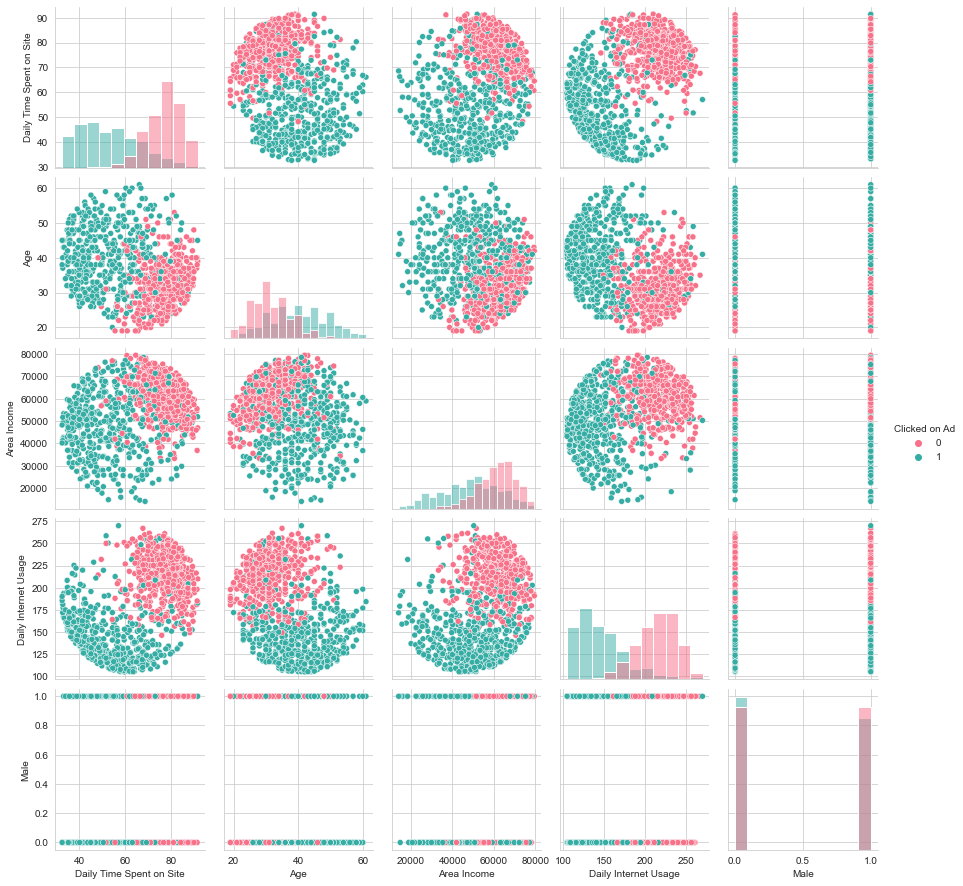

In [10]:
sns.pairplot(ad_data,hue='Clicked on Ad',diag_kind="hist",palette='husl')

# Regresión Logística

¡Dividamos en datos de entrenamiento y de prueba, y entrenemos nuestro modelo!

¡Tendrás libertad para elegir las columnas con las que quieras entrenar!

**Divida los datos en el conjunto de entrenamiento y prueba usando train_test_split**

In [11]:
ad_data.drop(['Ad Topic Line','Country','City','Timestamp'],axis=1,inplace=True)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(ad_data.drop('Clicked on Ad',axis=1),
                                                    ad_data['Clicked on Ad'],
                                                    test_size=0.30, 
                                                    random_state=101)

** Entrene y ajuste un modelo de regresión logística con el conjunto de entrenamiento.**

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

## Predicciones y Evaluaciones
** Ahora pronostique los valores para los datos de prueba.**

In [16]:
predictions = logmodel.predict(X_test)

**Crea un reporte de clasificación para el modelo.**

In [17]:
from sklearn.metrics import classification_report

In [18]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



### Matriz de confusión

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix(y_test,predictions)

array([[149,   8],
       [ 14, 129]], dtype=int64)

**Escriba algunos comentarios sobre los resultados**

## ¡Buen trabajo!